<a href="https://colab.research.google.com/github/manobhiram-123/loan_prediction_decisiontree/blob/main/loan_approval_detection_dtree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("loan_approval_dataset.csv")

In [3]:
df

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

In [5]:
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [35]:
df.describe()

loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06             4.388966e+06   
min     300.000000             -1.000000e+05             0.000000e+00   
25%     453.000000              2.200000e+06             1.300000e+06   
50%     600.000000              5.600000e+06             3.700000e+06   
75%     748.000000              1.130000e+07             7.600000e+06   
max     900.000000              2.910000e+07             1.940000e+07   

       luxury_assets_value  bank_asset_value  
count         4.269000e+03      4.269000e+03  
mean          1.512631e+07      4.976692e+06  
std           9.103754e+06      3.250185e+06  
min           3.000000e+05      0.000000e+00  
25%           7.500000e+06      2.300000e+06  
50%           1.460000e+07      4.600000e+06  
75%           2.170000e+07      7.100000e+06  
max           3.920000e+07      1.470000e+07

In [14]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [16]:
df.columns = df.columns.str.strip()

In [17]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [39]:
df_1 = df[df['cibil_score'] > 650][['cibil_score', 'loan_status']]
df_1

cibil_score loan_status
0             778    Approved
6             678    Approved
8             782    Approved
13            679    Approved
15            794    Approved
...           ...         ...
4250          731    Approved
4253          896    Approved
4261          881    Approved
4263          865    Approved
4267          780    Approved

[1792 rows x 2 columns]

In [40]:
df_1['loan_status'].value_counts()

loan_status
Approved    1781
Rejected      11
Name: count, dtype: int64

In [32]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

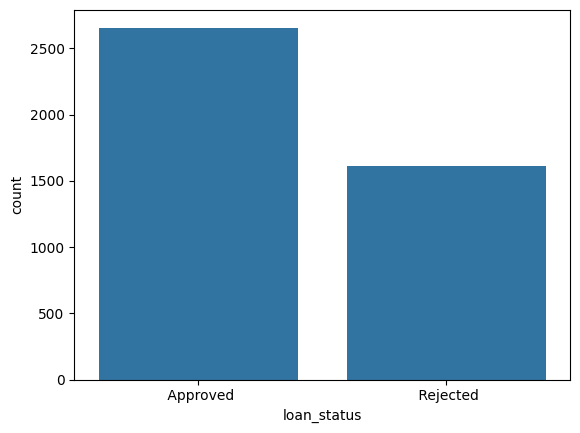

In [33]:
sns.countplot(x='loan_status', data=df)

<Axes: xlabel='cibil_score', ylabel='Count'>

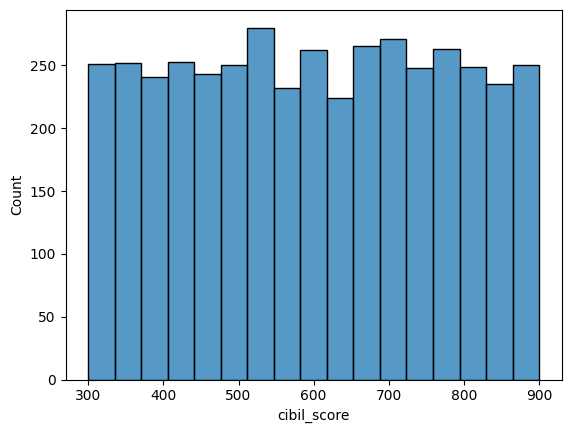

In [36]:
sns.histplot(df['cibil_score'])

<Axes: xlabel='loan_status', ylabel='cibil_score'>

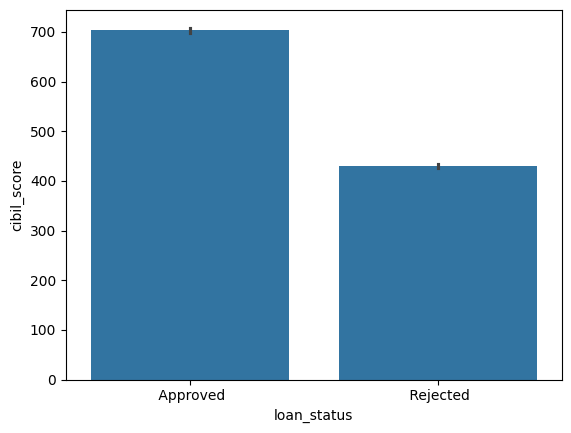

In [37]:
sns.barplot(x='loan_status', y='cibil_score', data=df)

<Axes: xlabel='loan_status', ylabel='cibil_score'>

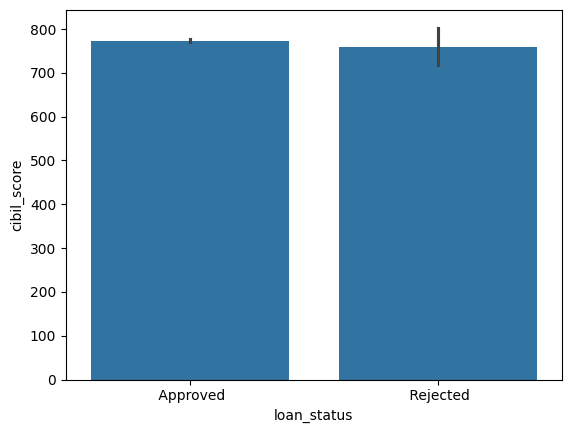

In [41]:
sns.barplot(x='loan_status', y='cibil_score', data=df_1)

<Axes: xlabel='cibil_score', ylabel='loan_status'>

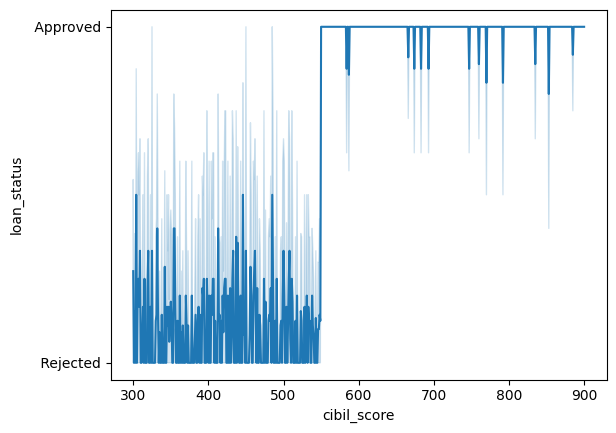

In [42]:
sns.lineplot(x='cibil_score', y='loan_status', data=df)

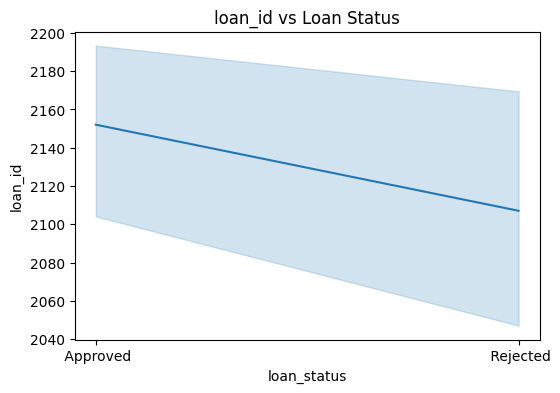

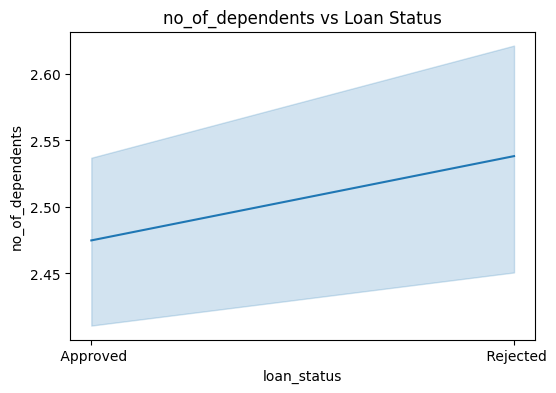

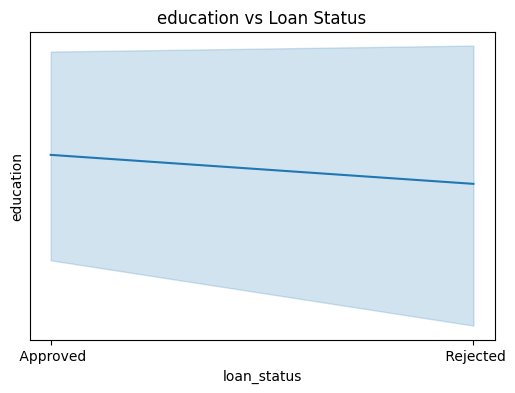

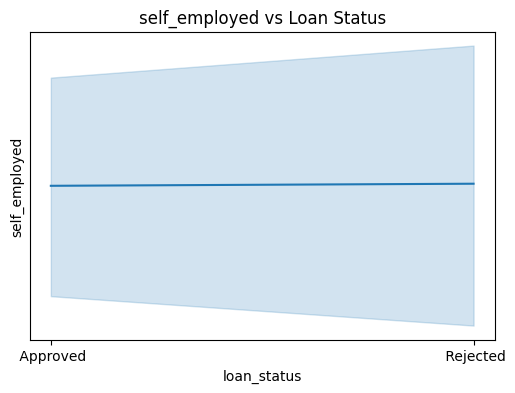

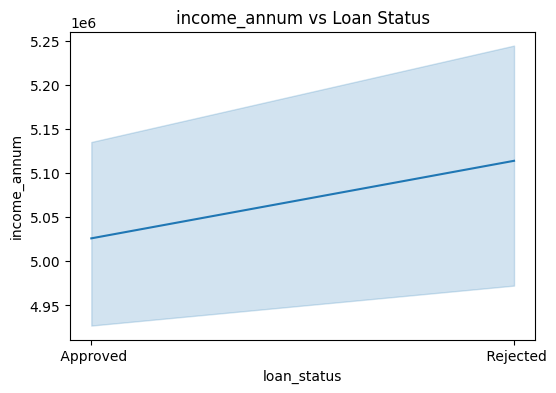

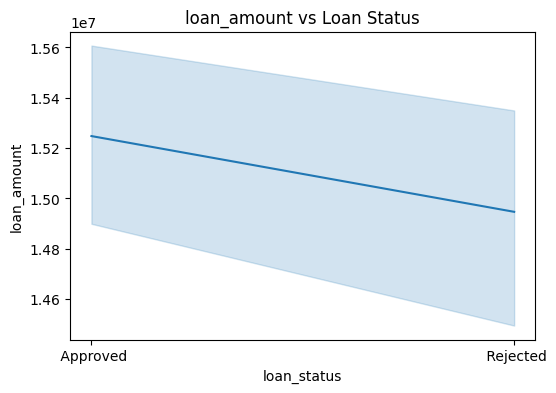

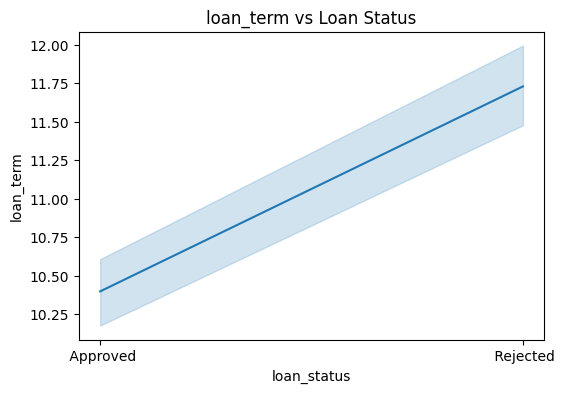

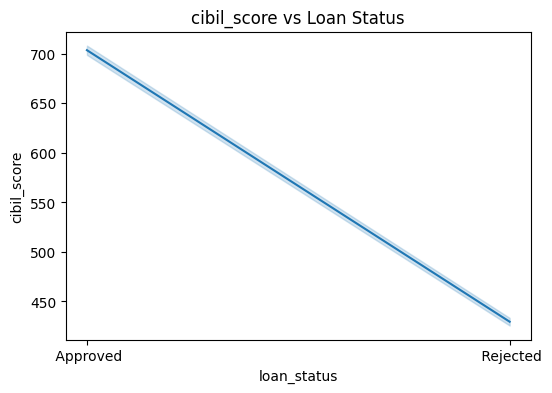

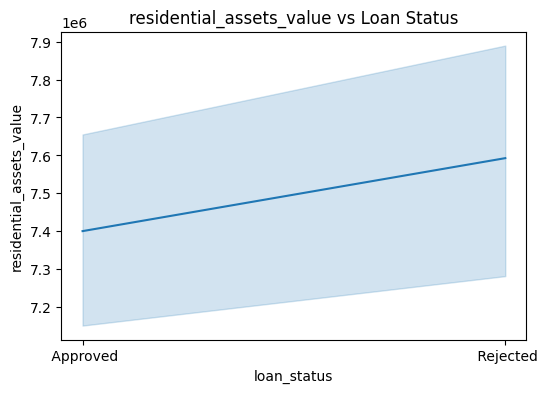

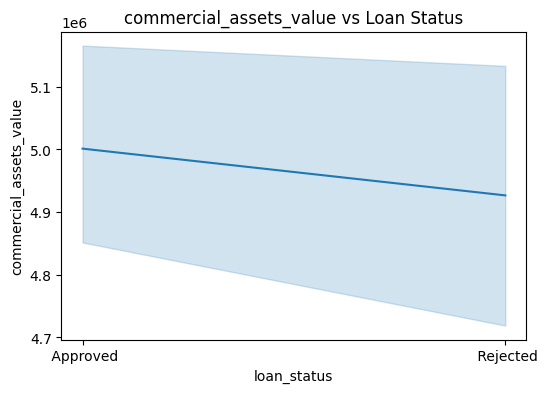

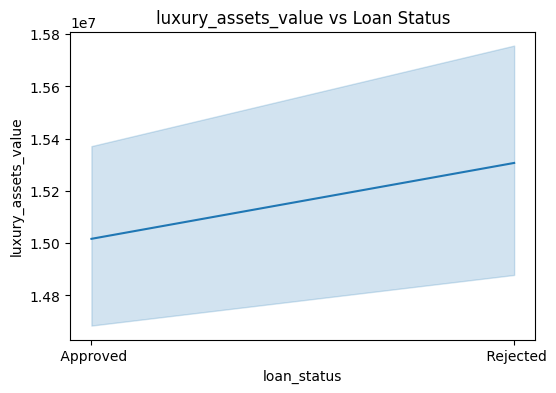

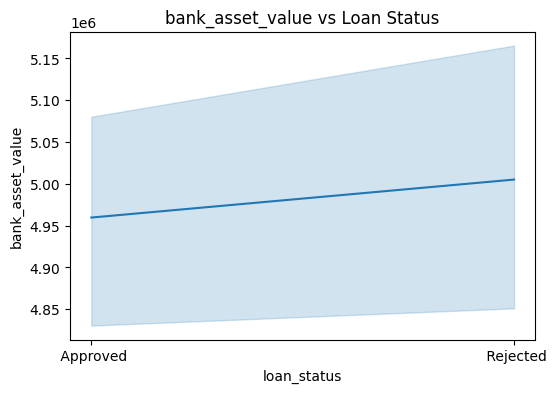

In [49]:


for col in df.columns:
    if col != 'loan_status':
        plt.figure(figsize=(6,4))
        sns.lineplot(x='loan_status', y=col, data=df)
        plt.title(f"{col} vs Loan Status")
        plt.show()


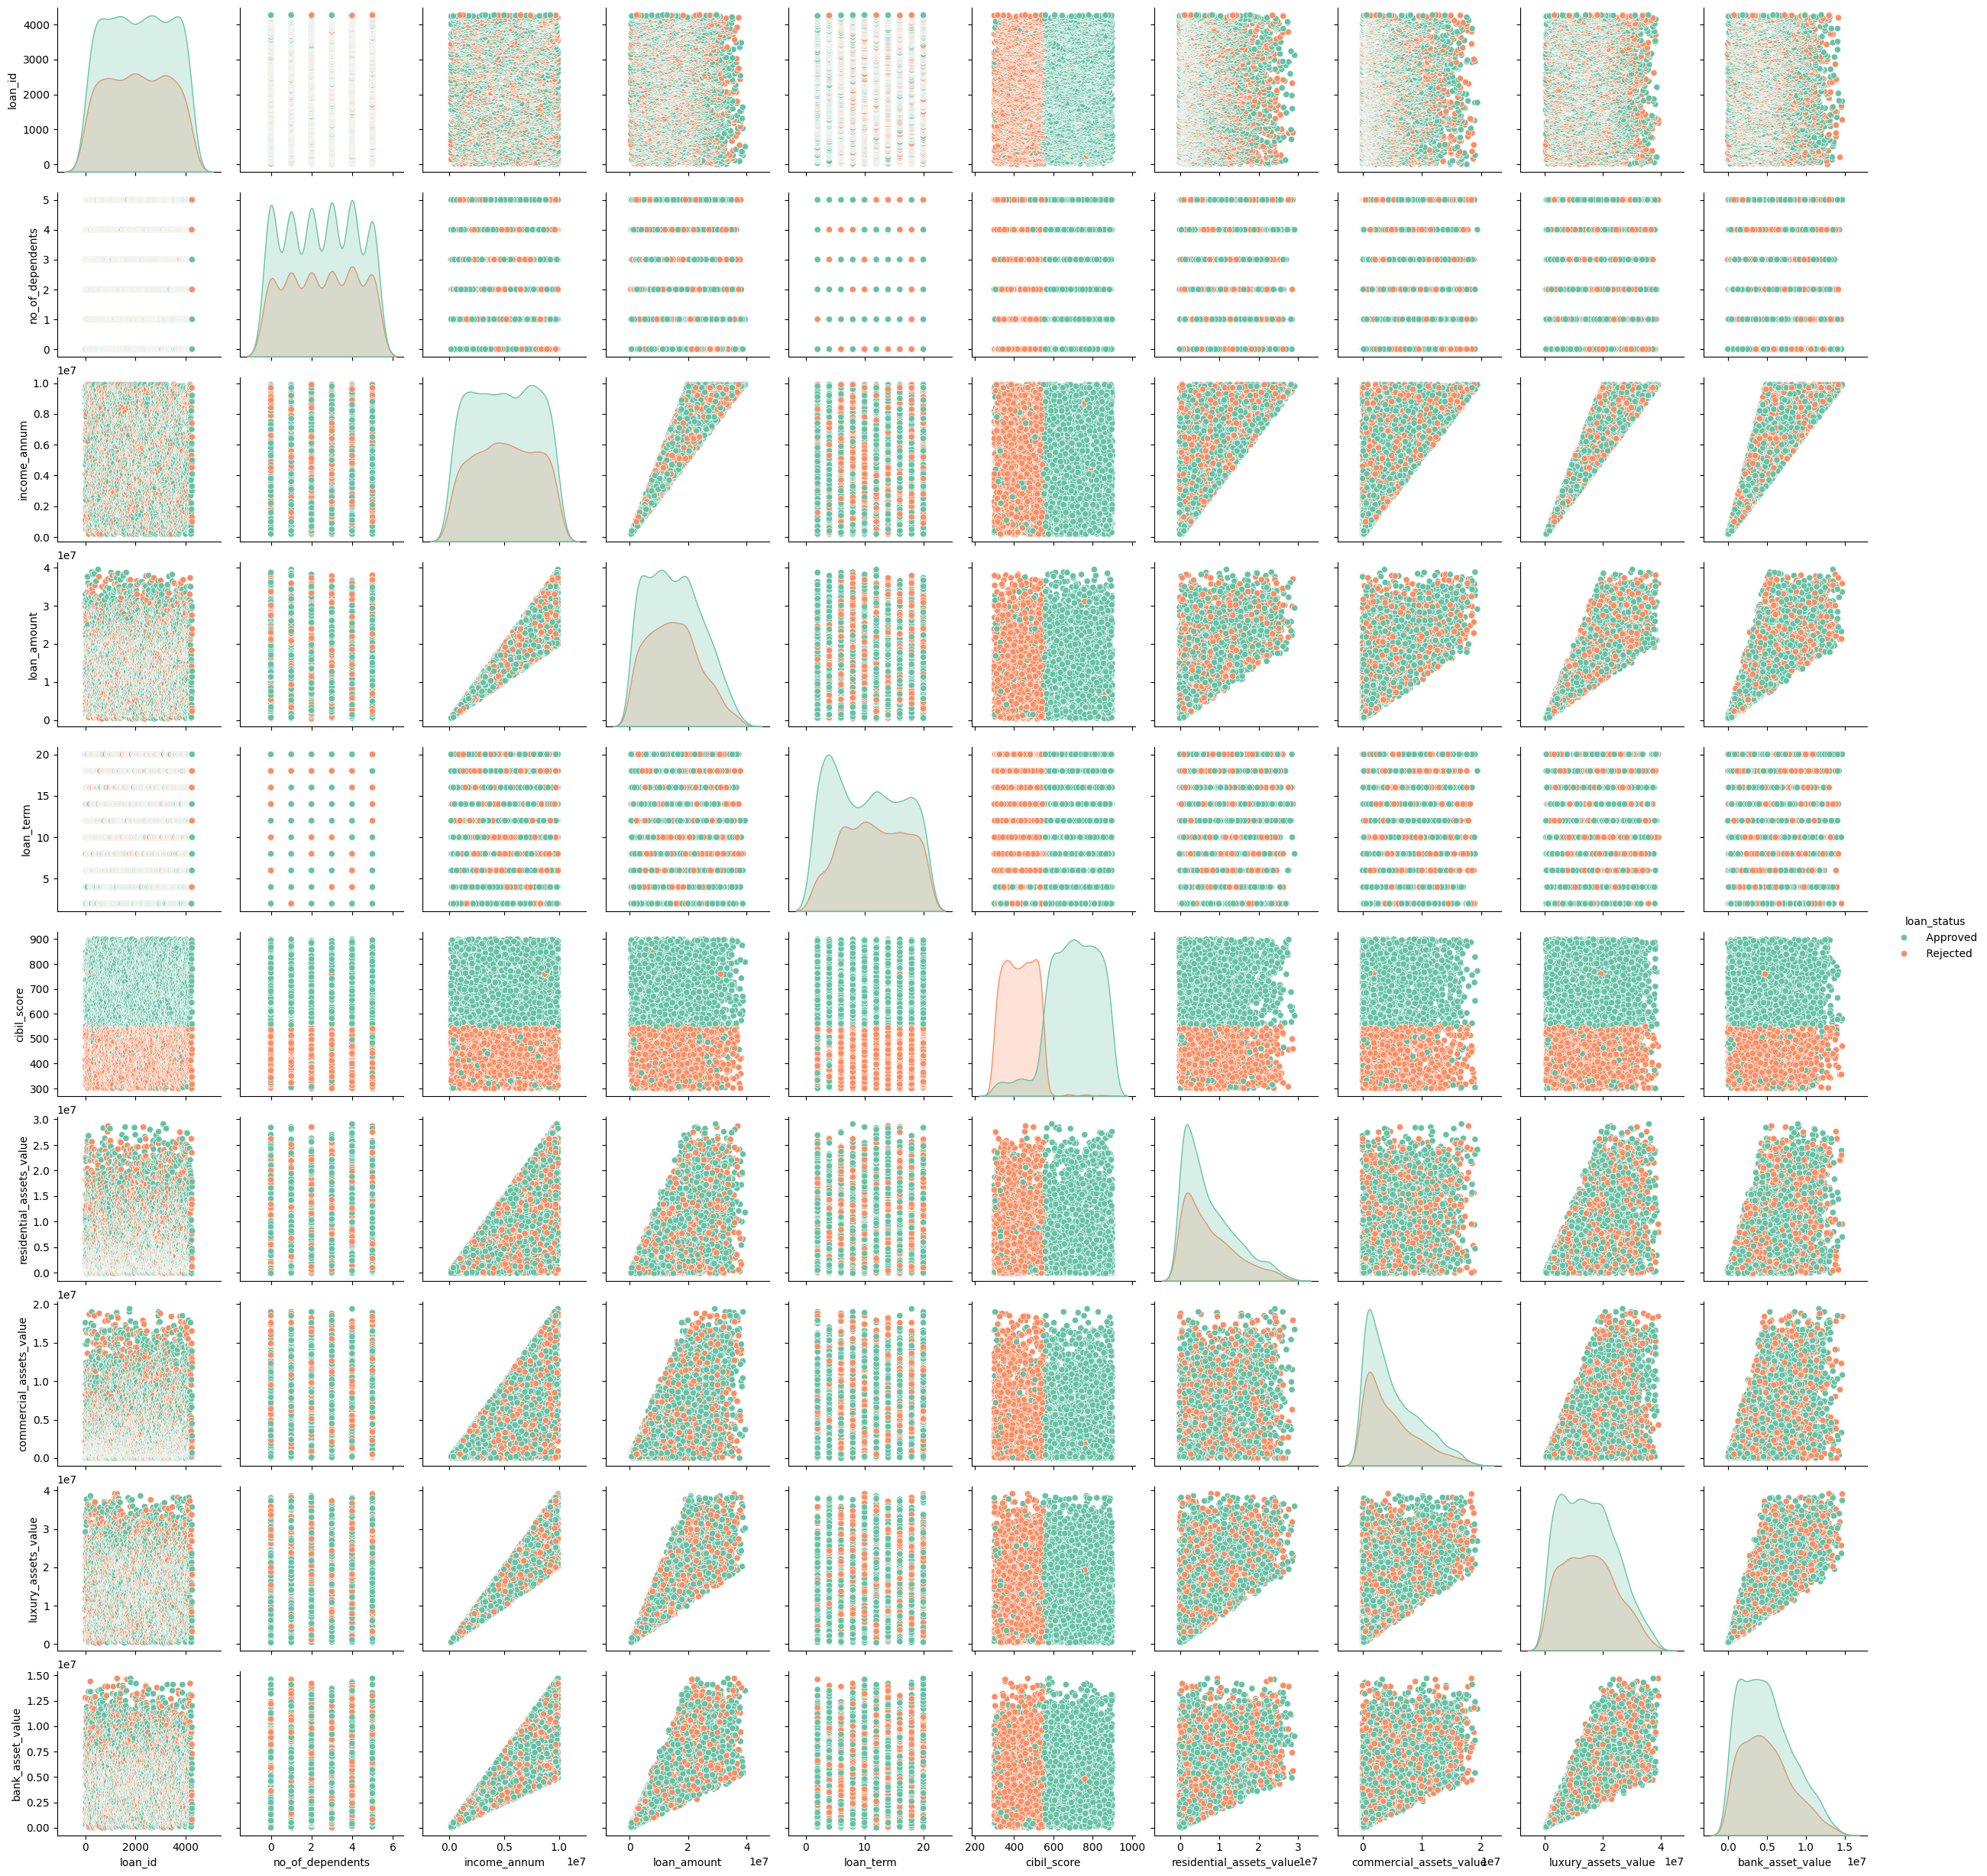

In [50]:



num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()


num_cols.append('loan_status')

sns.pairplot(df[num_cols], hue="loan_status", diag_kind="kde", palette="Set2")
plt.show()


In [109]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,roc_auc_score,log_loss
from sklearn.tree import DecisionTreeClassifier


In [55]:
le=LabelEncoder()
df['loan_status']=le.fit_transform(df['loan_status'])

In [59]:
df=pd.get_dummies(df,drop_first=True)
df.head(1)

loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
0        1                 2       9600000     29900000         12   

   cibil_score  residential_assets_value  commercial_assets_value  \
0          778                   2400000                 17600000   

   luxury_assets_value  bank_asset_value  loan_status  \
0             22700000           8000000            0   

   education_ Not Graduate  self_employed_ Yes  
0                    False               False

In [60]:
X=df.drop(['loan_id','loan_status'],axis=1)
y=df['loan_status']

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

# **Decision_tree_classifier**

In [138]:
model=DecisionTreeClassifier(max_depth=10,criterion='entropy')
model.fit(X_train_sc,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [139]:
y_pred=model.predict(X_test_sc)

In [140]:
y_prob=model.predict_proba(X_test_sc)
y_prob

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

**Evalute_model**

In [141]:
print("accuracy_score:",accuracy_score(y_test,y_pred)*100)
print("classification_report:\n",classification_report(y_test,y_pred))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))

accuracy_score: 98.00936768149883
classification_report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       536
           1       0.99      0.95      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854

confusion_matrix:
 [[534   2]
 [ 15 303]]


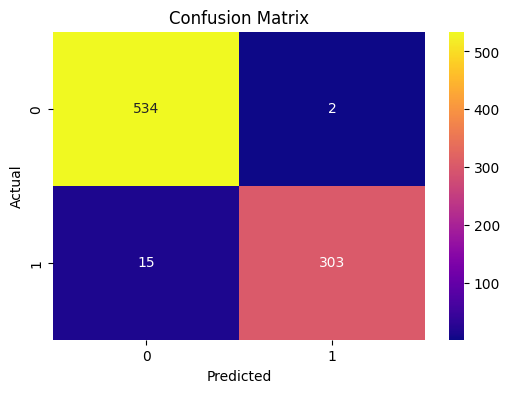

In [142]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap="plasma",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


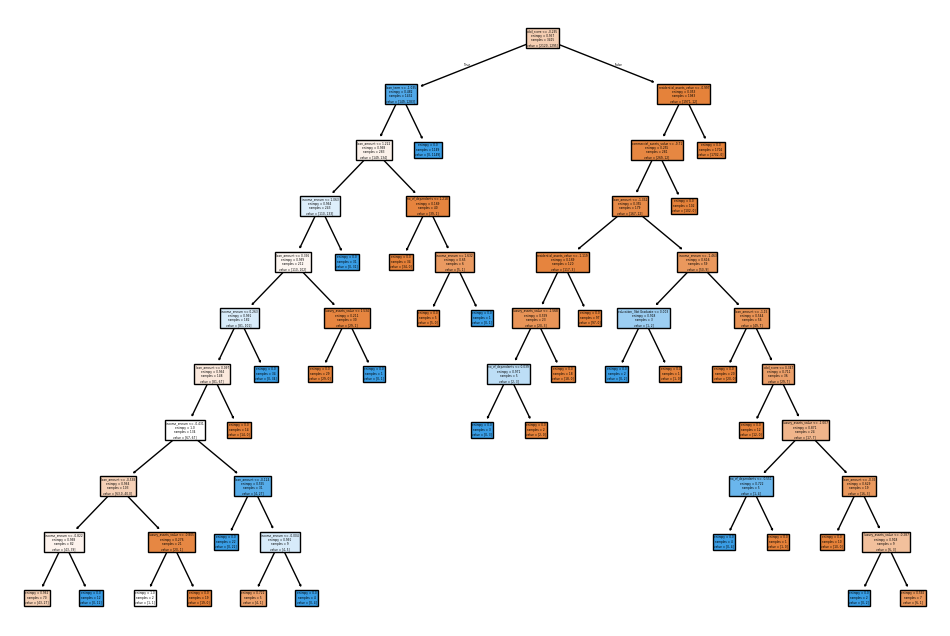

In [143]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

In [144]:
f1_score(y_test, y_pred, average='macro')

0.9785222389064361

In [145]:
f1_score(y_test, y_pred, average='weighted')

0.9800052409153729

In [146]:
roc_auc_score(y_test,y_prob[:,1])

np.float64(0.9911732610532245)

In [147]:
log_loss(y_test,y_prob)

0.27355753791035364

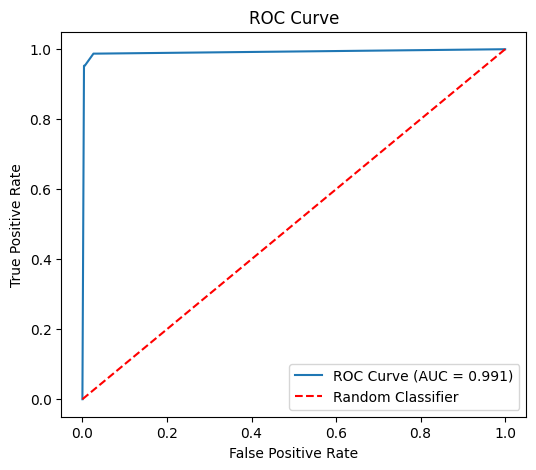

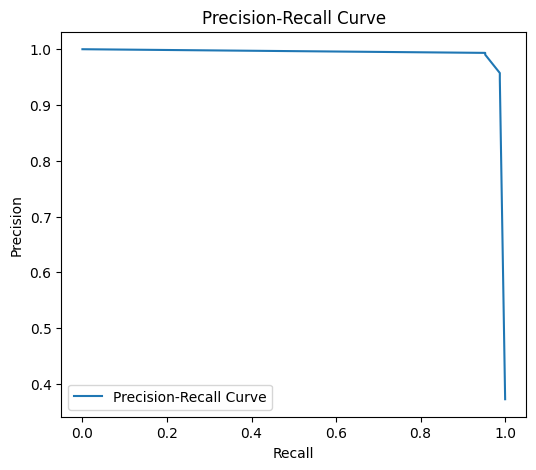

In [148]:

from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve



fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="red", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:,1])

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [149]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)


X_resampled, y_resampled = smote.fit_resample(X_train_sc, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE :", y_resampled.value_counts())

Before SMOTE: loan_status
0    2120
1    1295
Name: count, dtype: int64
After SMOTE : loan_status
0    2120
1    2120
Name: count, dtype: int64


In [150]:
model.fit(X_resampled,y_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [151]:
y_pred_sm=model.predict(X_test_sc)

In [152]:
accuracy_score(y_test,y_pred_sm)

0.9800936768149883